# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.6: Moving average

### 1.6.1: Time Series moving average

When reviewing how a time series changes (i.e. $\Delta X_t$), the error itself is normally random (called *white noise*) over time, but may have some dependency on the previous value.

For instance, if a stock increases in price one day, this may lead investors to sell their stock, leading to a decreasing (or a return to the mean) on the second day.

If we denote a positive $\epsilon_t$ to be an increase in buying for a given stock at time period $t$, we can model a stock's price change simply using the equation:

$\Delta p_t = \epsilon_t - 0.5 \epsilon_{t-1}$

That is, the price increases if there is more buying today, with a negative factor if there was more buying yesterday. This type of model is known as a moving average process, specifically one of order 1 (because we are only modelling one time step in the past). We denote this model a $MA(n)$ process for time steps of $n$, and the one above is a $MA(1)$ process because it cares about one step in the past.

Note: The process is an MA(1) process whether the coefficient on $\epsilon_{t-1}$ is positive or negative.

More formally, a MA(n) process is:

$MA(p) X_t = \mu + \epsilon_{t} + \sum_{i=1}^{p}\theta_i\epsilon_{t-i}$

Where $\mu$ is the error term (assumed to be iid) and $\theta_i$ is a learned parameter in the model (learned, say, from an OLS). The equation for MA(1) is the same, but it is worth noting it, as you'll see the pattern in quite a few places. We'll drop $\mu$ from the equation, and set $p=1$, giving:

$MA(1)X_t = \epsilon_t + \theta \epsilon_{t-1}$

Notably, and importantly, $\epsilon$ is assumed to be independently and identically distributed from a normal distribution with a mean of 0 and a standard deviation (of $\sigma^2$). This is an important requirement, otherwise the model has other patterns in it that need to be modelled separately.

<div class="alert alert-warning">
    In the above equation, we used $\theta$ as the parameter, while our previous models used $\beta$. It doesn't matter; they are the same thing. The choice here is for two reasons. First, most textbooks use $\theta$ in this spot. Second, we will combine an MA model with another model later, so we need the different symbols then.
</div>

<div class="alert alert-warning">
    Further, in the example, we modeled the change in some variable. This is not a requirement, as the values $X$ can be any variable, including (but not limited to) the change in value of some process.
</div>

In [1]:
%run setup.ipy

In [2]:
# Generate some random data for our epsilons, remembering they are iid

epsilons = np.random.randn(1000)

In [3]:
theta = np.array([-0.5])

X_t = epsilons[1:] + theta * epsilons[:-1]

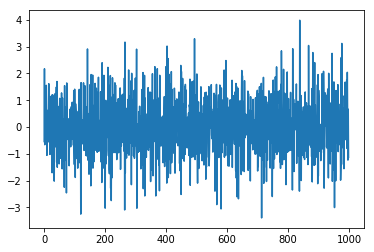

In [4]:
plt.plot(X_t)

In [5]:
# Fit a MA model. statsmodels doesn't expose this nicely directly, so we use ARMA, and turn "off" the AR bit.
# We will look at the full ARMA model later

In [6]:
from statsmodels import api as sm
model = sm.tsa.ARMA(X_t, order=(0, 1))

In [7]:
results = model.fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  999
Model:                     ARMA(0, 1)   Log Likelihood               -1423.412
Method:                       css-mle   S.D. of innovations              1.006
Date:                Mon, 29 Apr 2019   AIC                           2852.823
Time:                        16:05:09   BIC                           2867.544
Sample:                             0   HQIC                          2858.418
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0121      0.015      0.786      0.432      -0.018       0.042
ma.L1.y       -0.5160      0.028    -18.500      0.000      -0.571      -0.461
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.9380           +0.0000j            1.9380            0.0000
-----------------------------------------------------------------------------
"""

Note the coefficient for `ma.L1.y` is approximately our theta value from where we created this data - the model fit it well. The constant coefficient is zero too, which indicates it "learned" the zero mean correctly.

In [9]:
import quandl

interest_rates = quandl.get("RBA/F13_FOOIRATCR")
interest_rates = interest_rates[interest_rates.columns[0]]  # Extract the first column, whatever it is called
interest_rates.name = "InterestRate"  # Rename, as the original had a long name. Hint: don't use spaces or special chars

In [10]:
model = sm.tsa.ARMA(interest_rates, order=(0, 1))
interest_results = model.fit()

/home/rob/anaconda3/envs/quant/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [11]:
interest_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           InterestRate   No. Observations:                  351
Model:                     ARMA(0, 1)   Log Likelihood                -641.024
Method:                       css-mle   S.D. of innovations              1.499
Date:                Mon, 29 Apr 2019   AIC                           1288.049
Time:                        16:05:09   BIC                           1299.631
Sample:                    01-31-1990   HQIC                          1292.659
                         - 03-31-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.1495      0.153     33.736      0.000       4.850       5.449
ma.L1.InterestRate     0.9103      0.016     58.001      0.000       0.880       0.941
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0985           +0.0000j            1.0985            0.5000
-----------------------------------------------------------------------------
"""

#### Exercises

1. Fit an MA model to a stock price (the solution uses AAPL).
2. What are the coefficients on the constant and lag? What does this mean?
3. Fit the model on the change in stock price, rather than the actual price.
4. What are the coefficients, and how does that relate to the change in price?


#### Extended Exercise

We are going to drill right down now into a small dataset and observe how a $\epsilon$ value changes the result of the MA(1) model. Create a small dataset of just ten $\epsilon$ values of random 0s and 1s. Visualise the resulting MA model with a theta value of 0.5, -0.5, 2, -2, 100 and -100. Observe how runs of 0s and 1s are affected, and how a value affects the next time period in the series.

*For solutions, see `solutions/ma_model.py`*

### Properties of MA(1)

We can identify that the MA(1) process has an expected value of zero. Because the $\epsilon$ terms are iid with a mean of 0, the expected value for these values is 0. This gives us:

$E[X_t] = E[\epsilon_t + \theta \epsilon_{t-1}] = E[\epsilon_t] + \theta E[\epsilon_{t-1}] = 0$

Also note that $\theta$ is constant, and when you have a constant it can be taken out of the $E$. So, for constant $\theta$:

$E[\theta \epsilon] = \theta E[\epsilon]$

Next, we know the variance of $X_t$, again, because the values of $\epsilon$ are iid, with a mean of 0, and a standard deviation of $\sigma^2$ (from the definition). This gives us:

$Var(X_t) = Var(\epsilon_{t} + \theta \epsilon_{t-1} = Var(\epsilon_{t}) + \theta^2 Var(\epsilon_{t-1})$

Plugging in the known $Var(\epsilon_{t}) = \sigma^2$ gives us:

$Var(X_t) = \sigma^2 + \theta^2\sigma^2 = \sigma^2(1 + \theta^2)$

Finally, we could intuitively guess that the covariance at lagged intervales would approximate 0 for lags larger than the period of the MA model. More formally, if $i > 1$, then :

$Cov(X_t, X_{t-i}) = Cov(\epsilon_{t} + \theta\epsilon_{t-1}, \epsilon_{t-i} + \theta\epsilon_{t-i-i}) = 0$

This is because $\epsilon_{t}$ is iid (sidenote: this is a very useful property in statistics!) and there are no terms overlapping between the two $X$ lags being computed on. However, when $i=1$ there is an overlap, and the covariance is no longer 0:

$Cov(X_t, X_{t-1}) = Cov(\epsilon_{t} + \theta\epsilon_{t-1}, \epsilon_{t-1} + \theta\epsilon_{t-2})$

Once more, as $\epsilon_{t}$ is iid, when we expand this covariance, we only need to evaluate $Cov(\theta\epsilon_{t-1}, \epsilon_{t-1})$ as $Cov(\epsilon_{t}, \epsilon_{t+h})=0$ whenever $h \neq 0$.

$Cov(X_t, X_{t-1}) = \theta Cov(\epsilon_{t-1}, \epsilon_{t-1}) = \theta \sigma^2$

As $Cov(X_t, X_t+h)$ only depends on $h$ (i.e. only the lag matters, not when it was), the covariance doesn't change with time.

These three properties indicate that the MA(1) process is stationary. A property we will look at further in the next module.

#### Extended Exercise

1. Does an MA(2) model have an expected value of 0?
2. Does an MA(2) model have a covariance tending to 0 with increasing time lags?